In [40]:
# Dependencies
import pandas as pd
import hvplot.pandas
import requests
import matplotlib.pyplot as plt
import numpy as np
import json
import folium
from pprint import pprint
import itertools 

# Import API key
from api_keys import geoapify_key

In [41]:
# The correct encoding must be used to read the CSV in pandas
kyoto = pd.read_csv("Resources/Kyoto_Restaurant_Info.csv")
# attractions = pd.read_csv("Resources/Attractions.csv")
# Display sample data
kyoto_df=pd.DataFrame(kyoto)
kyoto_df



,Unnamed: 0,Name,JapaneseName,Station,FirstCategory,SecondCategory,DinnerPrice,LunchPrice,TotalRating,DinnerRating,LunchRating,ReviewNum,Lat,Long
0,1,Orudeidainingurajou,オールデイダイニング ラジョウ,Kyoto,Buffet style,Cafe,￥4000～￥4999,￥2000～￥2999,3.39,3.20,3.38,56,34.986175,135.761314
1,2,Steak Frites Gaspard zinzin,ステックフリット ガスパール ザンザン,Karasuma,Bistro,Steak,￥3000～￥3999,￥1000～￥1999,3.18,3.06,3.33,70,35.005826,135.759857
2,3,KAZUMA,和馬,Sanjo,Izakaya (Tavern),Japanese food (other),￥3000～￥3999,NaN,3.28,3.28,NaN,7,35.006583,135.770247
3,4,okonomiyakiteppanyakimiki,お好み焼き 鉄板焼き 三喜,Tambaguchi,Okonomiyaki,Izakaya (Tavern),￥3000～￥3999,NaN,3.14,3.14,NaN,16,34.995924,135.748267
4,5,Shaofeiyan,小肥羊 京都河原町店,Kyoto Shiyakusho Mae,Chinese hot pot / fire pot,Chinese,￥4000～￥4999,￥1000～￥1999,3.16,3.16,3.05,23,35.007901,135.768202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
890,891,Waraku,和楽,Fukuchiyama,Izakaya (Tavern),Kaiseki (Traditional Japanese),￥2000～￥2999,～￥999,3.00,3.06,3.00,12,35.298917,135.118341
891,892,YEBISU BAR,エビスバー 京都ヨドバシ店,Kyoto,Beer bar,Bar,￥3000～￥3999,～￥999,3.08,3.07,3.08,70,34.988132,135.759215
892,893,Ibushiginkazuya,燻吟 かず家,Kawaramachi,Bar,Nihonshu (Japanese sake),￥3000～￥3999,NaN,3.36,3.36,3.05,11,35.006449,135.769653
893,894,Tenichi,天一 京都伊勢丹店,Kyoto,Tempura,Ten-don (Tempura Bowl),￥6000～￥7999,￥2000～￥2999,3.51,3.32,3.53,52,34.985887,135.757672


# Remove Unnamed

In [42]:
kyoto_df.drop('Unnamed: 0', axis=1, inplace=True)

kyoto_df.head(5)

,Name,JapaneseName,Station,FirstCategory,SecondCategory,DinnerPrice,LunchPrice,TotalRating,DinnerRating,LunchRating,ReviewNum,Lat,Long
0,Orudeidainingurajou,オールデイダイニング ラジョウ,Kyoto,Buffet style,Cafe,￥4000～￥4999,￥2000～￥2999,3.39,3.20,3.38,56,34.986175,135.761314
1,Steak Frites Gaspard zinzin,ステックフリット ガスパール ザンザン,Karasuma,Bistro,Steak,￥3000～￥3999,￥1000～￥1999,3.18,3.06,3.33,70,35.005826,135.759857
2,KAZUMA,和馬,Sanjo,Izakaya (Tavern),Japanese food (other),￥3000～￥3999,NaN,3.28,3.28,NaN,7,35.006583,135.770247
3,okonomiyakiteppanyakimiki,お好み焼き 鉄板焼き 三喜,Tambaguchi,Okonomiyaki,Izakaya (Tavern),￥3000～￥3999,NaN,3.14,3.14,NaN,16,34.995924,135.748267
4,Shaofeiyan,小肥羊 京都河原町店,Kyoto Shiyakusho Mae,Chinese hot pot / fire pot,Chinese,￥4000～￥4999,￥1000～￥1999,3.16,3.16,3.05,23,35.007901,135.768202


In [43]:
len(kyoto_df)

895

In [44]:
kyoto_df.dropna(inplace=True)
print(len(kyoto_df))
kyoto_df

398


,Name,JapaneseName,Station,FirstCategory,SecondCategory,DinnerPrice,LunchPrice,TotalRating,DinnerRating,LunchRating,ReviewNum,Lat,Long
0,Orudeidainingurajou,オールデイダイニング ラジョウ,Kyoto,Buffet style,Cafe,￥4000～￥4999,￥2000～￥2999,3.39,3.20,3.38,56,34.986175,135.761314
1,Steak Frites Gaspard zinzin,ステックフリット ガスパール ザンザン,Karasuma,Bistro,Steak,￥3000～￥3999,￥1000～￥1999,3.18,3.06,3.33,70,35.005826,135.759857
4,Shaofeiyan,小肥羊 京都河原町店,Kyoto Shiyakusho Mae,Chinese hot pot / fire pot,Chinese,￥4000～￥4999,￥1000～￥1999,3.16,3.16,3.05,23,35.007901,135.768202
5,okuta-va,OCTAVAR,Kyoto,Bar,Italian,￥4000～￥4999,￥1000～￥1999,3.08,3.00,3.11,24,34.983497,135.760559
6,Resort dining&bar HaLe,Resort dining&bar HaLe 河原町店,Sanjo,Italian,Bar,￥3000～￥3999,￥1000～￥1999,3.04,3.05,3.00,22,35.007195,135.769468
...,...,...,...,...,...,...,...,...,...,...,...,...,...
888,Menshoutakamatsu,麺匠 たか松 本店,Karasuma,Tsukemen,Ramen,～￥999,～￥999,3.58,3.41,3.58,203,35.006261,135.760849
890,Waraku,和楽,Fukuchiyama,Izakaya (Tavern),Kaiseki (Traditional Japanese),￥2000～￥2999,～￥999,3.00,3.06,3.00,12,35.298917,135.118341
891,YEBISU BAR,エビスバー 京都ヨドバシ店,Kyoto,Beer bar,Bar,￥3000～￥3999,～￥999,3.08,3.07,3.08,70,34.988132,135.759215
893,Tenichi,天一 京都伊勢丹店,Kyoto,Tempura,Ten-don (Tempura Bowl),￥6000～￥7999,￥2000～￥2999,3.51,3.32,3.53,52,34.985887,135.757672


# Reset Index

In [45]:
kyoto_df = kyoto_df.reset_index(drop=True, inplace=False)
kyoto_df.head(7)


,Name,JapaneseName,Station,FirstCategory,SecondCategory,DinnerPrice,LunchPrice,TotalRating,DinnerRating,LunchRating,ReviewNum,Lat,Long
0,Orudeidainingurajou,オールデイダイニング ラジョウ,Kyoto,Buffet style,Cafe,￥4000～￥4999,￥2000～￥2999,3.39,3.20,3.38,56,34.986175,135.761314
1,Steak Frites Gaspard zinzin,ステックフリット ガスパール ザンザン,Karasuma,Bistro,Steak,￥3000～￥3999,￥1000～￥1999,3.18,3.06,3.33,70,35.005826,135.759857
2,Shaofeiyan,小肥羊 京都河原町店,Kyoto Shiyakusho Mae,Chinese hot pot / fire pot,Chinese,￥4000～￥4999,￥1000～￥1999,3.16,3.16,3.05,23,35.007901,135.768202
3,okuta-va,OCTAVAR,Kyoto,Bar,Italian,￥4000～￥4999,￥1000～￥1999,3.08,3.00,3.11,24,34.983497,135.760559
4,Resort dining&bar HaLe,Resort dining&bar HaLe 河原町店,Sanjo,Italian,Bar,￥3000～￥3999,￥1000～￥1999,3.04,3.05,3.00,22,35.007195,135.769468
5,Gionabesu,祇園 Abbesses,Gion Shijo,French,Italian,￥8000～￥9999,￥6000～￥7999,3.58,3.54,3.56,120,35.001954,135.774821
6,gionni-yongo,祗園245,Sanjo Keihan,Italian,French,￥10000～￥14999,￥6000～￥7999,3.85,3.83,3.75,39,35.006301,135.775623


# Clean up data frame

In [46]:
# Delete extraneous column
kyoto_df = kyoto_df.drop(columns = ["JapaneseName", "DinnerRating", "LunchRating"])
kyoto_df.head()

,Name,Station,FirstCategory,SecondCategory,DinnerPrice,LunchPrice,TotalRating,ReviewNum,Lat,Long
0,Orudeidainingurajou,Kyoto,Buffet style,Cafe,￥4000～￥4999,￥2000～￥2999,3.39,56,34.986175,135.761314
1,Steak Frites Gaspard zinzin,Karasuma,Bistro,Steak,￥3000～￥3999,￥1000～￥1999,3.18,70,35.005826,135.759857
2,Shaofeiyan,Kyoto Shiyakusho Mae,Chinese hot pot / fire pot,Chinese,￥4000～￥4999,￥1000～￥1999,3.16,23,35.007901,135.768202
3,okuta-va,Kyoto,Bar,Italian,￥4000～￥4999,￥1000～￥1999,3.08,24,34.983497,135.760559
4,Resort dining&bar HaLe,Sanjo,Italian,Bar,￥3000～￥3999,￥1000～￥1999,3.04,22,35.007195,135.769468


In [47]:
for index in range(len(kyoto_df["FirstCategory"])):   
    print(f"index:{index} - {kyoto_df.loc[index]['FirstCategory']}  |||  {kyoto_df.loc[index]['SecondCategory']}")

index:0 - Buffet style  |||  Cafe
index:1 - Bistro  |||  Steak
index:2 - Chinese hot pot / fire pot  |||  Chinese
index:3 - Bar  |||  Italian
index:4 - Italian  |||  Bar
index:5 - French  |||  Italian
index:6 - Italian  |||  French
index:7 - Izakaya (Tavern)  |||  Nihonshu (Japanese sake)
index:8 - Izakaya (Tavern)  |||  Seafood
index:9 - Pork Shabu Shabu  |||  Shabu Shabu (Japanese Steamboat)
index:10 - Izakaya (Tavern)  |||  Yakitori (Grilled chicken)
index:11 - Italian  |||  Western Cuisine
index:12 - Yakiniku (BBQ Beef)  |||  Sukiyaki
index:13 - Bistro  |||  Bar
index:14 - Italian  |||  Pasta
index:15 - Izakaya (Tavern)  |||  Creative cuisine
index:16 - Tempura  |||  Kaiseki (Traditional Japanese)
index:17 - Italian  |||  Pizza
index:18 - Dining bar  |||  Steak
index:19 - Izakaya (Tavern)  |||  Creative cuisine
index:20 - Buffet style  |||  Cafe
index:21 - Kaiseki (Traditional Japanese)  |||  Kyoto Cuisine
index:22 - Chinese  |||  Dim sum
index:23 - Kyoto Cuisine  |||  Kaiseki (Tra

In [48]:
searchfor = ["Italian","French","Spain","Bar","Traditional Café","Pizza","European","Pasta","Beef dishes"]

kyoto_df.loc[kyoto_df["FirstCategory"].str.contains('|'.join(searchfor))==True, "Region"]="European"
kyoto_df.head(1)

,Name,Station,FirstCategory,SecondCategory,DinnerPrice,LunchPrice,TotalRating,ReviewNum,Lat,Long,Region
0,Orudeidainingurajou,Kyoto,Buffet style,Cafe,￥4000～￥4999,￥2000～￥2999,3.39,56,34.986175,135.761314,NaN


# Define Restaurant Region

In [49]:
searchfor = []
search1 = ["Buffet","Chinese","Izakaya","Tempura","Kyoto","Korean","Viet","Kappo","Sushi","Tsukemen","Kappo"]
search2 = ["Kaiseki","Okonomiyaki","Pork","Yakiniku","eel","Sichuan","Shanghai","Sweets","Udon","Kushi-age"]
search3 = ["Kushi","Thailand","Tofu","Ryokan","Shabu","Yakitori","Okinawan","Crab","Creative","Noodle","soba","Soba"]
search4 = ["Blowfish","Seafood","Ramen","Japanese","India","other","Robatayaki","Oyako-don","Cantonese","Parfait"]
search5 = ["Innovative"]

searchfor = list(itertools.chain(search1,search2,search3,search4,search5))

kyoto_df.loc[kyoto_df["FirstCategory"].str.contains('|'.join(searchfor))==True, "Region"]="Asian"
kyoto_df.head()

,Name,Station,FirstCategory,SecondCategory,DinnerPrice,LunchPrice,TotalRating,ReviewNum,Lat,Long,Region
0,Orudeidainingurajou,Kyoto,Buffet style,Cafe,￥4000～￥4999,￥2000～￥2999,3.39,56,34.986175,135.761314,Asian
1,Steak Frites Gaspard zinzin,Karasuma,Bistro,Steak,￥3000～￥3999,￥1000～￥1999,3.18,70,35.005826,135.759857,NaN
2,Shaofeiyan,Kyoto Shiyakusho Mae,Chinese hot pot / fire pot,Chinese,￥4000～￥4999,￥1000～￥1999,3.16,23,35.007901,135.768202,Asian
3,okuta-va,Kyoto,Bar,Italian,￥4000～￥4999,￥1000～￥1999,3.08,24,34.983497,135.760559,European
4,Resort dining&bar HaLe,Sanjo,Italian,Bar,￥3000～￥3999,￥1000～￥1999,3.04,22,35.007195,135.769468,European


In [50]:
search1 = ["Steak","Beer bar","Bistro","Teppanyaki","Dining","Cafe","Western","Beer","Mexico","Crepes","Pancake"]
search2 = ["Bread","Mexico","Bread","table d'hôte"]

searchfor = list(itertools.chain(search1,search2))


kyoto_df.loc[kyoto_df["FirstCategory"].str.contains('|'.join(searchfor))==True, "Region"]="American"
kyoto_df.head(5)


,Name,Station,FirstCategory,SecondCategory,DinnerPrice,LunchPrice,TotalRating,ReviewNum,Lat,Long,Region
0,Orudeidainingurajou,Kyoto,Buffet style,Cafe,￥4000～￥4999,￥2000～￥2999,3.39,56,34.986175,135.761314,Asian
1,Steak Frites Gaspard zinzin,Karasuma,Bistro,Steak,￥3000～￥3999,￥1000～￥1999,3.18,70,35.005826,135.759857,American
2,Shaofeiyan,Kyoto Shiyakusho Mae,Chinese hot pot / fire pot,Chinese,￥4000～￥4999,￥1000～￥1999,3.16,23,35.007901,135.768202,Asian
3,okuta-va,Kyoto,Bar,Italian,￥4000～￥4999,￥1000～￥1999,3.08,24,34.983497,135.760559,European
4,Resort dining&bar HaLe,Sanjo,Italian,Bar,￥3000～￥3999,￥1000～￥1999,3.04,22,35.007195,135.769468,European


In [51]:
kyoto_df[kyoto_df['Region'].isin(["Asian","European","American"])==False]
kyoto_df.head()

,Name,Station,FirstCategory,SecondCategory,DinnerPrice,LunchPrice,TotalRating,ReviewNum,Lat,Long,Region
0,Orudeidainingurajou,Kyoto,Buffet style,Cafe,￥4000～￥4999,￥2000～￥2999,3.39,56,34.986175,135.761314,Asian
1,Steak Frites Gaspard zinzin,Karasuma,Bistro,Steak,￥3000～￥3999,￥1000～￥1999,3.18,70,35.005826,135.759857,American
2,Shaofeiyan,Kyoto Shiyakusho Mae,Chinese hot pot / fire pot,Chinese,￥4000～￥4999,￥1000～￥1999,3.16,23,35.007901,135.768202,Asian
3,okuta-va,Kyoto,Bar,Italian,￥4000～￥4999,￥1000～￥1999,3.08,24,34.983497,135.760559,European
4,Resort dining&bar HaLe,Sanjo,Italian,Bar,￥3000～￥3999,￥1000～￥1999,3.04,22,35.007195,135.769468,European


In [52]:
region_counts = kyoto_df['Region'].value_counts()
region_counts

Asian       250
European     85
American     63
Name: Region, dtype: int64

# Soft ReviewNum Large to low

In [53]:
kyoto_softReviewNum_df = kyoto_df.sort_values("ReviewNum", ascending=False)
kyoto_softReviewNum_df.head()

,Name,Station,FirstCategory,SecondCategory,DinnerPrice,LunchPrice,TotalRating,ReviewNum,Lat,Long,Region
336,Honkedaiichiasahi,Kyoto,Ramen,Dumplings,～￥999,～￥999,3.60,1319,34.986695,135.762508,Asian
273,chuukasobatakayasu,Ichijoji,Ramen,Boneless deep-fried chicken,～￥999,～￥999,3.59,713,35.045052,135.785180,Asian
14,Zasoudouhigashiyamakyouto,Gion Shijo,Italian,Pasta,￥6000～￥7999,￥2000～￥2999,3.61,272,34.998896,135.779668,European
25,Kyoutogiontempurayasakaendou,Gion Shijo,Tempura,Kaiseki (Traditional Japanese),￥10000～￥14999,￥5000～￥5999,3.68,252,34.998915,135.775112,Asian
393,Menshoutakamatsu,Karasuma,Tsukemen,Ramen,～￥999,～￥999,3.58,203,35.006261,135.760849,Asian


# Soft TotalRating Large to low

In [54]:
kyoto_softRatingNum_df = kyoto_df.sort_values("TotalRating", ascending=False)
kyoto_softRatingNum_df.head(5)

,Name,Station,FirstCategory,SecondCategory,DinnerPrice,LunchPrice,TotalRating,ReviewNum,Lat,Long,Region
363,ORTO,Karasuma Oike,Innovative cuisine,Fusion cuisine,￥8000～￥9999,￥4000～￥4999,4.06,53,35.007991,135.757053,Asian
50,Yosuke YAMAJI,Gion Shijo,French,Modern French,￥20000～￥29999,￥8000～￥9999,4.02,44,35.002708,135.775670,European
270,nihonryourisakuragawa,Kyoto Shiyakusho Mae,Kaiseki (Traditional Japanese),Kappo (Traditional Japanese),￥20000～￥29999,￥8000～￥9999,3.89,61,35.012176,135.770684,Asian
200,Orudohonkonresutorankyouto,Shijo,Chinese,Cantonese Cuisine,￥10000～￥14999,￥1000～￥1999,3.88,148,35.003150,135.759123,Asian
6,gionni-yongo,Sanjo Keihan,Italian,French,￥10000～￥14999,￥6000～￥7999,3.85,39,35.006301,135.775623,European


In [55]:
print(kyoto_softReviewNum_df.columns)

Index(['Name', 'Station', 'FirstCategory', 'SecondCategory', 'DinnerPrice',
       'LunchPrice', 'TotalRating', 'ReviewNum', 'Lat', 'Long', 'Region'],
      dtype='object')


# Dinner Price split up


In [56]:
kyoto_df["DinnerPriceLow"] = ""
kyoto_df["DinnerPriceHigh"] = ""
for i, row in kyoto_df.iterrows():
    DinnerPrice = row["DinnerPrice"].split("～")
    kyoto_df.at[i, "DinnerPriceLow"] = DinnerPrice[0]
    kyoto_df.at[i, "DinnerPriceHigh"] = DinnerPrice[1]

# kyoto_df.drop(columns=["DinnerPrice"], inplace=True)
kyoto_df

,Name,Station,FirstCategory,SecondCategory,DinnerPrice,LunchPrice,TotalRating,ReviewNum,Lat,Long,Region,DinnerPriceLow,DinnerPriceHigh
0,Orudeidainingurajou,Kyoto,Buffet style,Cafe,￥4000～￥4999,￥2000～￥2999,3.39,56,34.986175,135.761314,Asian,￥4000,￥4999
1,Steak Frites Gaspard zinzin,Karasuma,Bistro,Steak,￥3000～￥3999,￥1000～￥1999,3.18,70,35.005826,135.759857,American,￥3000,￥3999
2,Shaofeiyan,Kyoto Shiyakusho Mae,Chinese hot pot / fire pot,Chinese,￥4000～￥4999,￥1000～￥1999,3.16,23,35.007901,135.768202,Asian,￥4000,￥4999
3,okuta-va,Kyoto,Bar,Italian,￥4000～￥4999,￥1000～￥1999,3.08,24,34.983497,135.760559,European,￥4000,￥4999
4,Resort dining&bar HaLe,Sanjo,Italian,Bar,￥3000～￥3999,￥1000～￥1999,3.04,22,35.007195,135.769468,European,￥3000,￥3999
...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,Menshoutakamatsu,Karasuma,Tsukemen,Ramen,～￥999,～￥999,3.58,203,35.006261,135.760849,Asian,,￥999
394,Waraku,Fukuchiyama,Izakaya (Tavern),Kaiseki (Traditional Japanese),￥2000～￥2999,～￥999,3.00,12,35.298917,135.118341,Asian,￥2000,￥2999
395,YEBISU BAR,Kyoto,Beer bar,Bar,￥3000～￥3999,～￥999,3.08,70,34.988132,135.759215,American,￥3000,￥3999
396,Tenichi,Kyoto,Tempura,Ten-don (Tempura Bowl),￥6000～￥7999,￥2000～￥2999,3.51,52,34.985887,135.757672,Asian,￥6000,￥7999


# Lunch Price split up

In [57]:
kyoto_df["LunchPriceLow"] = ""
kyoto_df["LunchPriceHigh"] = ""
for i, row in kyoto_df.iterrows():
     if not pd.isna(row["LunchPrice"]):
        if "～" in str(row["LunchPrice"]):
            LunchPrice = str(row["LunchPrice"]).split("～")
            kyoto_df.at[i, "LunchPriceLow"] = LunchPrice[0]
            kyoto_df.at[i, "LunchPriceHigh"] = LunchPrice[1]

# kyoto_df.drop(columns=["LunchPrice"], inplace=True)
kyoto_df.head()
    

,Name,Station,FirstCategory,SecondCategory,DinnerPrice,LunchPrice,TotalRating,ReviewNum,Lat,Long,Region,DinnerPriceLow,DinnerPriceHigh,LunchPriceLow,LunchPriceHigh
0,Orudeidainingurajou,Kyoto,Buffet style,Cafe,￥4000～￥4999,￥2000～￥2999,3.39,56,34.986175,135.761314,Asian,￥4000,￥4999,￥2000,￥2999
1,Steak Frites Gaspard zinzin,Karasuma,Bistro,Steak,￥3000～￥3999,￥1000～￥1999,3.18,70,35.005826,135.759857,American,￥3000,￥3999,￥1000,￥1999
2,Shaofeiyan,Kyoto Shiyakusho Mae,Chinese hot pot / fire pot,Chinese,￥4000～￥4999,￥1000～￥1999,3.16,23,35.007901,135.768202,Asian,￥4000,￥4999,￥1000,￥1999
3,okuta-va,Kyoto,Bar,Italian,￥4000～￥4999,￥1000～￥1999,3.08,24,34.983497,135.760559,European,￥4000,￥4999,￥1000,￥1999
4,Resort dining&bar HaLe,Sanjo,Italian,Bar,￥3000～￥3999,￥1000～￥1999,3.04,22,35.007195,135.769468,European,￥3000,￥3999,￥1000,￥1999


# Convert Yen to USD Dollar

In [58]:
kyoto_df['DinnerPriceLow'] = kyoto_df['DinnerPriceLow'].str.replace('￥', '')
kyoto_df['DinnerPriceHigh'] = kyoto_df['DinnerPriceHigh'].str.replace('￥', '')
kyoto_df['LunchPriceLow'] = kyoto_df['LunchPriceLow'].str.replace('￥', '')
kyoto_df['LunchPriceHigh'] = kyoto_df['LunchPriceHigh'].str.replace('￥', '')

kyoto_df

,Name,Station,FirstCategory,SecondCategory,DinnerPrice,LunchPrice,TotalRating,ReviewNum,Lat,Long,Region,DinnerPriceLow,DinnerPriceHigh,LunchPriceLow,LunchPriceHigh
0,Orudeidainingurajou,Kyoto,Buffet style,Cafe,￥4000～￥4999,￥2000～￥2999,3.39,56,34.986175,135.761314,Asian,4000,4999,2000,2999
1,Steak Frites Gaspard zinzin,Karasuma,Bistro,Steak,￥3000～￥3999,￥1000～￥1999,3.18,70,35.005826,135.759857,American,3000,3999,1000,1999
2,Shaofeiyan,Kyoto Shiyakusho Mae,Chinese hot pot / fire pot,Chinese,￥4000～￥4999,￥1000～￥1999,3.16,23,35.007901,135.768202,Asian,4000,4999,1000,1999
3,okuta-va,Kyoto,Bar,Italian,￥4000～￥4999,￥1000～￥1999,3.08,24,34.983497,135.760559,European,4000,4999,1000,1999
4,Resort dining&bar HaLe,Sanjo,Italian,Bar,￥3000～￥3999,￥1000～￥1999,3.04,22,35.007195,135.769468,European,3000,3999,1000,1999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,Menshoutakamatsu,Karasuma,Tsukemen,Ramen,～￥999,～￥999,3.58,203,35.006261,135.760849,Asian,,999,,999
394,Waraku,Fukuchiyama,Izakaya (Tavern),Kaiseki (Traditional Japanese),￥2000～￥2999,～￥999,3.00,12,35.298917,135.118341,Asian,2000,2999,,999
395,YEBISU BAR,Kyoto,Beer bar,Bar,￥3000～￥3999,～￥999,3.08,70,34.988132,135.759215,American,3000,3999,,999
396,Tenichi,Kyoto,Tempura,Ten-don (Tempura Bowl),￥6000～￥7999,￥2000～￥2999,3.51,52,34.985887,135.757672,Asian,6000,7999,2000,2999


In [59]:
kyoto_df = kyoto_df[kyoto_df['DinnerPriceLow'].str.isnumeric()]
kyoto_df = kyoto_df[kyoto_df['DinnerPriceHigh'].str.isnumeric()]
kyoto_df = kyoto_df[kyoto_df['LunchPriceLow'].str.isnumeric()]
kyoto_df = kyoto_df[kyoto_df['LunchPriceHigh'].str.isnumeric()]
kyoto_df['DinnerPriceLow'] = kyoto_df['DinnerPriceLow'].astype(int)
kyoto_df['DinnerPriceHigh'] = kyoto_df['DinnerPriceHigh'].astype(int)
kyoto_df['LunchPriceLow'] = kyoto_df['LunchPriceLow'].astype(int)
kyoto_df['LunchPriceHigh'] = kyoto_df['LunchPriceHigh'].astype(int)

In [60]:
kyoto_df.dtypes

Name                object
Station             object
FirstCategory       object
SecondCategory      object
DinnerPrice         object
LunchPrice          object
TotalRating        float64
ReviewNum            int64
Lat                float64
Long               float64
Region              object
DinnerPriceLow       int64
DinnerPriceHigh      int64
LunchPriceLow        int64
LunchPriceHigh       int64
dtype: object

In [61]:
kyoto_df.count()

Name               285
Station            285
FirstCategory      285
SecondCategory     285
DinnerPrice        285
LunchPrice         285
TotalRating        285
ReviewNum          285
Lat                285
Long               285
Region             285
DinnerPriceLow     285
DinnerPriceHigh    285
LunchPriceLow      285
LunchPriceHigh     285
dtype: int64

In [62]:
exchange_rate = 0.0076
price_columns = ['DinnerPriceLow', 'DinnerPriceHigh', 'LunchPriceLow', 'LunchPriceHigh']
kyoto_df[price_columns] = kyoto_df[price_columns].apply(lambda x: x * exchange_rate)

kyoto_df

,Name,Station,FirstCategory,SecondCategory,DinnerPrice,LunchPrice,TotalRating,ReviewNum,Lat,Long,Region,DinnerPriceLow,DinnerPriceHigh,LunchPriceLow,LunchPriceHigh
0,Orudeidainingurajou,Kyoto,Buffet style,Cafe,￥4000～￥4999,￥2000～￥2999,3.39,56,34.986175,135.761314,Asian,30.4,37.9924,15.2,22.7924
1,Steak Frites Gaspard zinzin,Karasuma,Bistro,Steak,￥3000～￥3999,￥1000～￥1999,3.18,70,35.005826,135.759857,American,22.8,30.3924,7.6,15.1924
2,Shaofeiyan,Kyoto Shiyakusho Mae,Chinese hot pot / fire pot,Chinese,￥4000～￥4999,￥1000～￥1999,3.16,23,35.007901,135.768202,Asian,30.4,37.9924,7.6,15.1924
3,okuta-va,Kyoto,Bar,Italian,￥4000～￥4999,￥1000～￥1999,3.08,24,34.983497,135.760559,European,30.4,37.9924,7.6,15.1924
4,Resort dining&bar HaLe,Sanjo,Italian,Bar,￥3000～￥3999,￥1000～￥1999,3.04,22,35.007195,135.769468,European,22.8,30.3924,7.6,15.1924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,Okonomiyakitonchinkan,Kyoto Shiyakusho Mae,Okonomiyaki,Monjya yaki,￥2000～￥2999,￥1000～￥1999,3.05,28,35.007693,135.768390,Asian,15.2,22.7924,7.6,15.1924
391,Kifuneugenta,Kurama,Kyoto Cuisine,Kaiseki (Traditional Japanese),￥10000～￥14999,￥6000～￥7999,3.54,55,35.124295,135.763782,Asian,76.0,113.9924,45.6,60.7924
392,teuchiudonishokuyabongu,Nishi Maizuru,Izakaya (Tavern),Udon,￥1000～￥1999,￥1000～￥1999,3.07,14,35.446114,135.328733,Asian,7.6,15.1924,7.6,15.1924
396,Tenichi,Kyoto,Tempura,Ten-don (Tempura Bowl),￥6000～￥7999,￥2000～￥2999,3.51,52,34.985887,135.757672,Asian,45.6,60.7924,15.2,22.7924


# Combine First and second Category

In [63]:
kyoto_df['Category'] = kyoto_df[['FirstCategory', 'SecondCategory']].apply(lambda x: ' '.join(x.astype(str)), axis=1)


# Setup Question for Tourisum ask Lunch Price and Dinner Price by US dollar

In [64]:
DinnerPriceLow = kyoto_df.groupby(["DinnerPriceLow"])["Category"].count()
DinnerPriceLow_range = DinnerPriceLow.index.values
DinnerPriceLow_count = DinnerPriceLow.values

DinnerPriceHigh = kyoto_df.groupby(["DinnerPriceHigh"])["Category"].count()
DinnerPriceHigh_range = DinnerPriceHigh.index.values
DinnerPriceHigh_count = DinnerPriceHigh.values

In [65]:
DinnerPrice_df = pd.DataFrame({
                                "DinnerPriceLow": DinnerPriceLow_range, 
                                "DinnerPriceLow Count": DinnerPriceLow_count,
                                "DinnerPriceHigh": DinnerPriceHigh_range, 
                                "DinnerPriceHigh Count": DinnerPriceHigh_count,
                             })

DinnerPrice_df

,DinnerPriceLow,DinnerPriceLow Count,DinnerPriceHigh,DinnerPriceHigh Count
0,7.6,23,15.1924,23
1,15.2,25,22.7924,25
2,22.8,63,30.3924,63
3,30.4,47,37.9924,47
4,38.0,33,45.5924,33
5,45.6,32,60.7924,32
6,60.8,25,75.9924,25
7,76.0,28,113.9924,28
8,114.0,4,151.9924,4
9,152.0,5,227.9924,5


In [66]:
x = str(input("Enter the lowest price you would like to pay"))

# Price for Dinner

In [67]:
# Enter prices for Dinner
lowPrice= int(input("Enter the lowest price you would like to pay for dinner:  "))
highPrice= int(input("Enter the Highest price you would like to pay for dinner:  "))

Dinner_df = kyoto_df.query("DinnerPriceLow >= @lowPrice and DinnerPriceLow <= @highPrice")
Dinner_df[['Name','Category','DinnerPriceLow','DinnerPriceHigh','Region']]

,Name,Category,DinnerPriceLow,DinnerPriceHigh,Region
0,Orudeidainingurajou,Buffet style Cafe,30.4,37.9924,Asian
1,Steak Frites Gaspard zinzin,Bistro Steak,22.8,30.3924,American
2,Shaofeiyan,Chinese hot pot / fire pot Chinese,30.4,37.9924,Asian
3,okuta-va,Bar Italian,30.4,37.9924,European
4,Resort dining&bar HaLe,Italian Bar,22.8,30.3924,European
...,...,...,...,...,...
389,Tatsumiya,Kyoto Cuisine Hot Pot (other),60.8,75.9924,Asian
390,Okonomiyakitonchinkan,Okonomiyaki Monjya yaki,15.2,22.7924,Asian
391,Kifuneugenta,Kyoto Cuisine Kaiseki (Traditional Japanese),76.0,113.9924,Asian
396,Tenichi,Tempura Ten-don (Tempura Bowl),45.6,60.7924,Asian


# Price for Lunch

In [68]:
# Enter prices for Lunch
lowPrice= int(input("Enter the lowest price you would like to pay for lunch:  "))
highPrice= int(input("Enter the Highest price you would like to pay for lunch:  "))

Dinner_df = kyoto_df.query("LunchPriceLow >= @lowPrice and LunchPriceLow <= @highPrice")
Dinner_df[['Name','Category','LunchPriceLow','LunchPriceHigh','Region']]

,Name,Category,LunchPriceLow,LunchPriceHigh,Region
0,Orudeidainingurajou,Buffet style Cafe,15.2,22.7924,Asian
8,ANAGOYA NORESORE,Izakaya (Tavern) Seafood,15.2,22.7924,Asian
9,kyoutohyouto,Pork Shabu Shabu Shabu Shabu (Japanese Steamboat),15.2,22.7924,Asian
13,Kyoutodaina,Bistro Bar,15.2,22.7924,American
14,Zasoudouhigashiyamakyouto,Italian Pasta,15.2,22.7924,European
...,...,...,...,...,...
381,Kaisekihyouki,Kappo (Traditional Japanese) Kyoto Cuisine,30.4,37.9924,Asian
383,Kabochanotane,Kappo (Traditional Japanese) Kyoto Cuisine,15.2,22.7924,Asian
389,Tatsumiya,Kyoto Cuisine Hot Pot (other),22.8,30.3924,Asian
396,Tenichi,Tempura Ten-don (Tempura Bowl),15.2,22.7924,Asian


In [69]:
print(kyoto_df.columns)


Index(['Name', 'Station', 'FirstCategory', 'SecondCategory', 'DinnerPrice',
       'LunchPrice', 'TotalRating', 'ReviewNum', 'Lat', 'Long', 'Region',
       'DinnerPriceLow', 'DinnerPriceHigh', 'LunchPriceLow', 'LunchPriceHigh',
       'Category'],
      dtype='object')


In [70]:
unique_values = kyoto_df['Region'].unique()
print(unique_values.dtype)


object


# This is for Final Clean DF

In [71]:
# Rearrange the columns
kyoto_df = kyoto_df[['Name', 'Station', 'FirstCategory', 'SecondCategory', 'TotalRating', 'ReviewNum', 'DinnerPriceLow', 'DinnerPriceHigh', 'LunchPriceLow', 'LunchPriceHigh', 'Region', 'Lat', 'Long']]
kyoto_df=pd.DataFrame(kyoto_df)
# print(kyoto_df)
kyoto_df

,Name,Station,FirstCategory,SecondCategory,TotalRating,ReviewNum,DinnerPriceLow,DinnerPriceHigh,LunchPriceLow,LunchPriceHigh,Region,Lat,Long
0,Orudeidainingurajou,Kyoto,Buffet style,Cafe,3.39,56,30.4,37.9924,15.2,22.7924,Asian,34.986175,135.761314
1,Steak Frites Gaspard zinzin,Karasuma,Bistro,Steak,3.18,70,22.8,30.3924,7.6,15.1924,American,35.005826,135.759857
2,Shaofeiyan,Kyoto Shiyakusho Mae,Chinese hot pot / fire pot,Chinese,3.16,23,30.4,37.9924,7.6,15.1924,Asian,35.007901,135.768202
3,okuta-va,Kyoto,Bar,Italian,3.08,24,30.4,37.9924,7.6,15.1924,European,34.983497,135.760559
4,Resort dining&bar HaLe,Sanjo,Italian,Bar,3.04,22,22.8,30.3924,7.6,15.1924,European,35.007195,135.769468
...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,Okonomiyakitonchinkan,Kyoto Shiyakusho Mae,Okonomiyaki,Monjya yaki,3.05,28,15.2,22.7924,7.6,15.1924,Asian,35.007693,135.768390
391,Kifuneugenta,Kurama,Kyoto Cuisine,Kaiseki (Traditional Japanese),3.54,55,76.0,113.9924,45.6,60.7924,Asian,35.124295,135.763782
392,teuchiudonishokuyabongu,Nishi Maizuru,Izakaya (Tavern),Udon,3.07,14,7.6,15.1924,7.6,15.1924,Asian,35.446114,135.328733
396,Tenichi,Kyoto,Tempura,Ten-don (Tempura Bowl),3.51,52,45.6,60.7924,15.2,22.7924,Asian,34.985887,135.757672


# Review Number on the Kyoto Map

In [72]:
%%capture --no-display

# Configure the map plot
kyoto_restmap_info = kyoto_softReviewNum_df.hvplot.points(
    "Long",
    "Lat",
    geo = True,
    tiles = "OSM",
    size = "ReviewNum",
    color = "Region",
    hover_cols = ["Name"])

# Display the map
kyoto_restmap_info
# Save Map screen shot


:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Long,Lat]   (Region,ReviewNum,Name)

# Top 5 Review Number on the Kyoto Map

In [73]:
%%capture --no-display

# Configure the map plot
kyoto_restmap_info = kyoto_softReviewNum_df.head(5).hvplot.points(
    "Long",
    "Lat",
    geo = True,
    tiles = "OSM",
    size = "ReviewNum",
    color = "Region",
    hover_cols = ["Name"])

# Display the map
kyoto_restmap_info
# Save Map screen shot

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Long,Lat]   (Region,ReviewNum,Name)

# Top 5 rating Number on the Kyoto Map

In [74]:

%%capture --no-display

# Configure the map plot
kyoto_restmap_info = kyoto_softRatingNum_df.head(5).hvplot.points(
    "Long",
    "Lat",
    geo = True,
    tiles = "OSM",
    size = "ReviewNum",
    color = "Region",
    hover_cols = ["Name"])

# Display the map
kyoto_restmap_info
# Save Map screen shot


:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Long,Lat]   (Region,ReviewNum,Name)

# Region Counts on chart

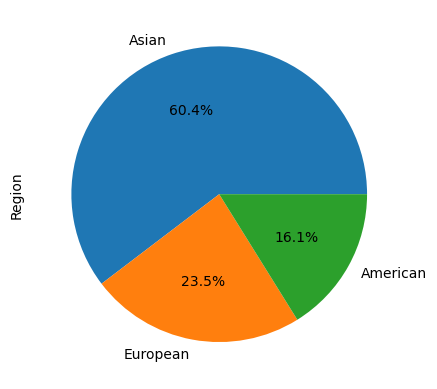

In [75]:
counts = kyoto_df.Region.value_counts()
counts.plot(kind="pie",autopct='%1.1f%%')
plt.show()

# Number of Restaurants by Chart

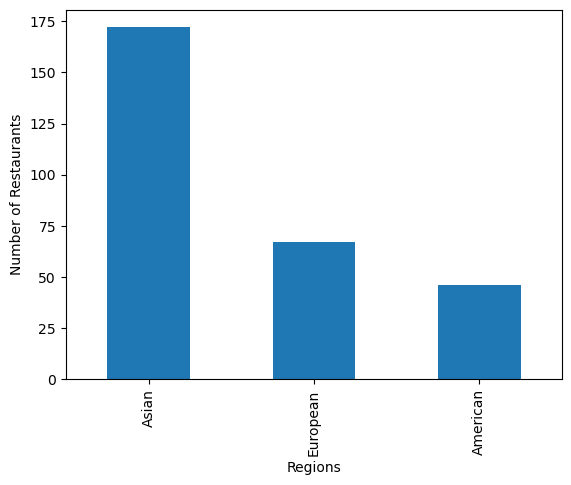

In [76]:
counts = kyoto_df['Region'].value_counts()
counts.plot(kind="bar")
plt.xlabel("Regions")
plt.xticks(rotation=90)
plt.ylabel("Number of Restaurants")
plt.show()

# Zahra work

In [77]:
kyoto_softReviewNum_df.groupby(['Region']).max()


,Name,Station,FirstCategory,SecondCategory,DinnerPrice,LunchPrice,TotalRating,ReviewNum,Lat,Long
Region,,,,,,,,,,
American,teppanyakiaoi,Yamanouchi,table d'hôte,beer restaurant,￥8000～￥9999,￥6000～￥7999,3.59,131,35.031333,135.818278
Asian,yakinikutobi-ruichibakouji,Yawatashi,Yakitori (Grilled chicken),table d'hôte,￥8000～￥9999,￥8000～￥9999,4.06,1319,35.735303,135.831994
European,wainandooyasaibarubejibaru,Tambaguchi,Traditional Café,Wine bar,￥8000～￥9999,￥8000～￥9999,4.02,272,35.453135,135.791238


In [78]:
kyoto_softReviewNum_df.groupby(['Region']).min()

,Name,Station,FirstCategory,SecondCategory,DinnerPrice,LunchPrice,TotalRating,ReviewNum,Lat,Long
Region,,,,,,,,,,
American,Ajoiichanchi,Fushimi Momoyama,Beer,BBQ,～￥999,～￥999,3.0,4,34.889691,135.706495
Asian,ANAGOYA NORESORE,Kameoka,Buffet style,Asian & ethnic cuisine (and others),～￥999,～￥999,3.0,2,34.715818,135.094284
European,Al Vere,Arashiyama,Bar,Bar,～￥999,～￥999,3.0,2,34.933230,135.329018


In [79]:
kyoto_softReviewNum_df.groupby(['Region']).sum()

,TotalRating,ReviewNum,Lat,Long
Region,,,,
American,203.71,2462,2204.764720,8553.016196
Asian,819.97,10246,8752.043736,33937.124697
European,279.59,3480,2975.893911,11539.261110


In [80]:
american_s = kyoto_softReviewNum_df['Region'] == "American"
asian_s = kyoto_softReviewNum_df['Region'] == "Asian"
european_s = kyoto_softReviewNum_df['Region'] == "European"
american_s.sum()

63

In [81]:
kyoto_softReviewNum_df[american_s]

,Name,Station,FirstCategory,SecondCategory,DinnerPrice,LunchPrice,TotalRating,ReviewNum,Lat,Long,Region
261,Yukinoshita,Nijojo Mae,Pancake,Shaved ice (snow cone),￥1000～￥1999,￥1000～￥1999,3.58,131,35.008472,135.753701,American
224,FORTUNE GARDEN KYOTO,Kyoto Shiyakusho Mae,Bistro,Western Cuisine,￥4000～￥4999,￥1000～￥1999,3.59,107,35.012517,135.768752,American
274,cafe Cento Cento,Kyoto,Cafe,Pasta,￥2000～￥2999,￥1000～￥1999,3.00,84,34.985989,135.759636,American
159,Southern Court,Kyoto,Dining bar,Western (Others),￥3000～￥3999,￥2000～￥2999,3.58,82,34.986078,135.759592,American
330,Kikusui,Gion Shijo,Western Cuisine,French,￥3000～￥3999,￥1000～￥1999,3.18,82,35.003981,135.772275,American
...,...,...,...,...,...,...,...,...,...,...,...
388,guridorufo-suitsuraku,Karasuma,Teppanyaki,Steak,￥5000～￥5999,￥1000～￥1999,3.06,8,35.006302,135.760360,American
309,Garejisankyukafe,Uzumasa Tenjingawa,Cafe,Izakaya (other),￥2000～￥2999,￥2000～￥2999,3.03,7,35.013872,135.716223,American
120,Teramachihambagugokurakutombo,Kyoto Shiyakusho Mae,Hamburger Steak,Western Cuisine,￥3000～￥3999,￥1000～￥1999,3.04,6,35.014167,135.767410,American
197,Sutekihanasato,Gion Shijo,Steak,Teppanyaki,￥20000～￥29999,￥6000～￥7999,3.17,5,35.005750,135.775635,American


# Max, Min, mean Region Chart

TotalRating               
                 max  min      mean
Region                             
American        3.59  3.0  3.248478
Asian           4.06  3.0  3.307907
European        4.02  3.0  3.307761

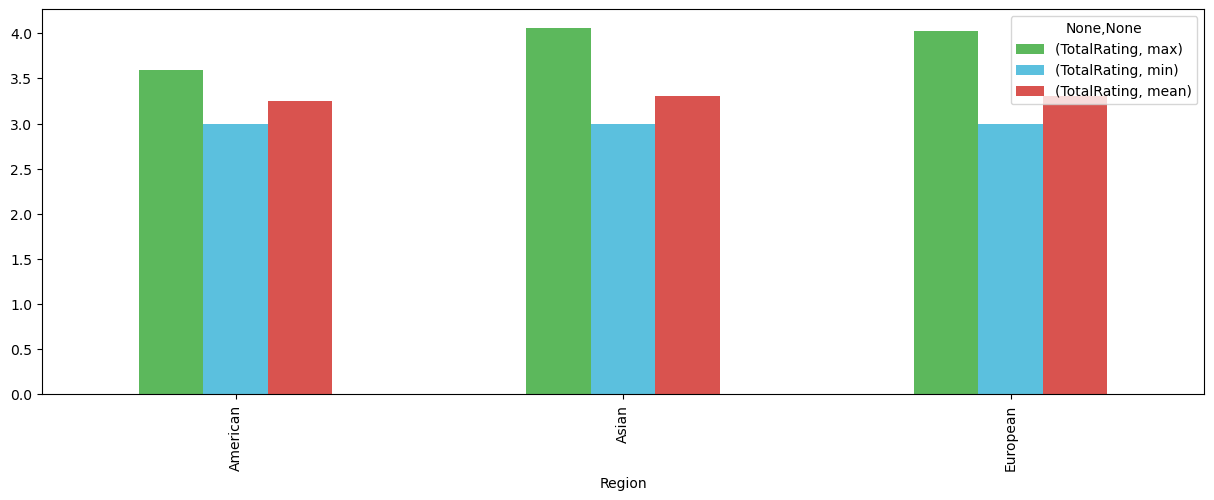

In [82]:
# Group the data by Region and calculate the mean of the Rating and Review columns
TotalRating_df = kyoto_df.groupby('Region').agg({'TotalRating': ['max', 'min', 'mean']})
TotalRating_df.plot(kind='bar', figsize=(15, 5), color=['#5cb85c','#5bc0de','#d9534f'])
TotalRating_df

# Average Rating and Review by Region

,ReviewNum,TotalRating
Region,,
American,18.73,3.25
Asian,55.53,3.31
European,29.72,3.31


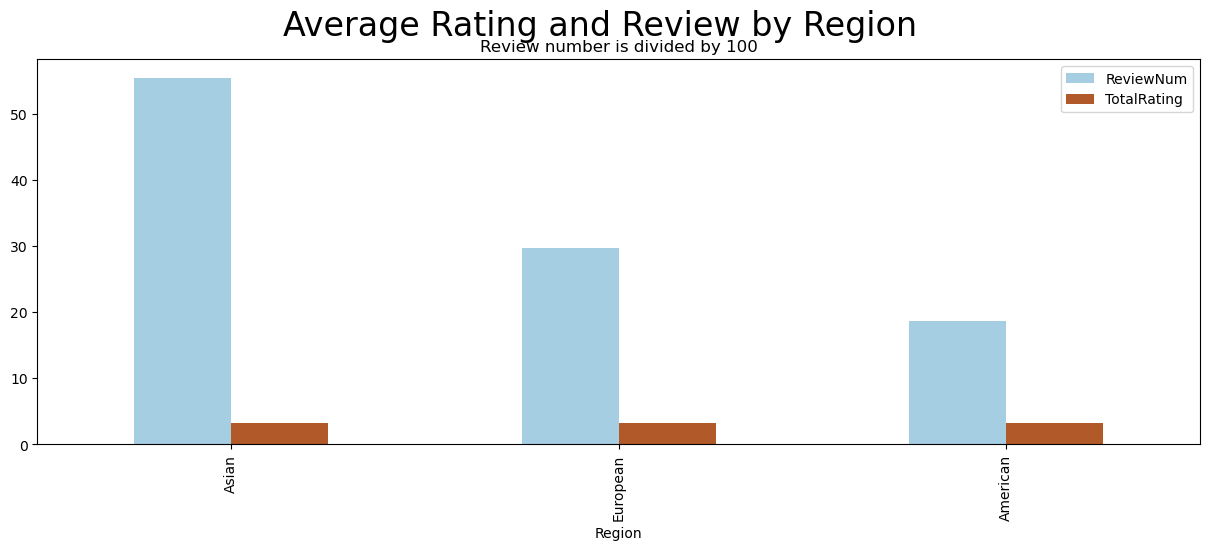

In [83]:
grouped = kyoto_df.groupby('Region').agg({'ReviewNum': 'sum', 'TotalRating': 'mean'})
grouped["TotalRating"] = round(grouped["TotalRating"], 2)
grouped["ReviewNum"] = grouped["ReviewNum"] / 100
grouped.sort_values("ReviewNum", ascending=False).plot(kind='bar', figsize=(15, 5), colormap='Paired')
plt.title("Review number is divided by 100")
plt.suptitle('Average Rating and Review by Region',fontsize=24)
grouped